<a href="https://colab.research.google.com/github/yonghwadragon/10-Prisoners-Strategy-Simulation/blob/main/10%EB%AA%85%EC%9D%98%EC%A3%84%EC%88%98_%EC%88%9C%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정리하기전

## 랜덤 고정

In [ ]:
import random
random.seed(42)

## 죄수들이 무작위로 상자를 열 때의 시뮬레이션

In [ ]:
def simulate_prisoners_random():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    print(f"상자에 들어있는 번호들: {boxes}")

    # 10명의 죄수들이 무작위로 5개의 상자를 열어보는 시뮬레이션
    for prisoner in range(1, 11):
        print(f"\n죄수 {prisoner}가 상자를 열기 시작합니다.")
        found = False
        attempts = random.sample(range(1, 11), 5)  # 무작위로 5개의 상자를 선택

        for attempt in attempts:
            print(f"  상자 {attempt}를 열었습니다. -> 상자 안에 있는 번호: {boxes[attempt - 1]}")
            if boxes[attempt - 1] == prisoner:
                found = True
                print(f"  죄수 {prisoner}가 자신의 번호를 찾았습니다!")
                break

        if not found:
            print(f"  죄수 {prisoner}는 자신의 번호를 찾지 못했습니다.")
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

# 시뮬레이션 실행
if simulate_prisoners_random():
    print("\n모든 죄수가 자신의 번호를 찾아서 석방되었습니다!")
else:
    print("\n한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...")

상자에 들어있는 번호들: [8, 4, 3, 9, 6, 7, 10, 5, 1, 2]

죄수 1가 상자를 열기 시작합니다.
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 2
  상자 7를 열었습니다. -> 상자 안에 있는 번호: 10
  상자 1를 열었습니다. -> 상자 안에 있는 번호: 8
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 5
  상자 9를 열었습니다. -> 상자 안에 있는 번호: 1
  죄수 1가 자신의 번호를 찾았습니다!

죄수 2가 상자를 열기 시작합니다.
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 9
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 2
  죄수 2가 자신의 번호를 찾았습니다!

죄수 3가 상자를 열기 시작합니다.
  상자 9를 열었습니다. -> 상자 안에 있는 번호: 1
  상자 7를 열었습니다. -> 상자 안에 있는 번호: 10
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 9
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 5
  상자 5를 열었습니다. -> 상자 안에 있는 번호: 6
  죄수 3는 자신의 번호를 찾지 못했습니다.

한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...


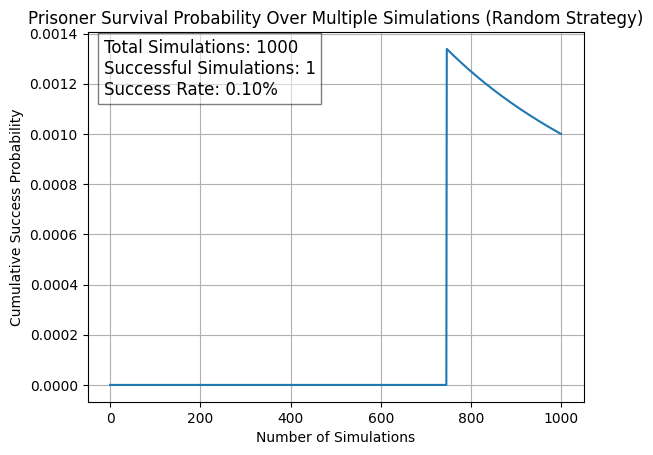

총 시뮬레이션 횟수: 1000
무작위 전략 성공 횟수: 1
무작위 전략 성공 확률: 0.10%


In [ ]:
import matplotlib.pyplot as plt

def simulate_prisoners_random():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    # 10명의 죄수들이 무작위로 5개의 상자를 열어보는 시뮬레이션
    for prisoner in range(1, 11):
        found = False
        attempts = random.sample(range(1, 11), 5)  # 무작위로 5개의 상자를 선택

        for attempt in attempts:
            if boxes[attempt - 1] == prisoner:
                found = True
                break

        if not found:
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

def run_random_simulations(trials):
    success_count = 0
    results = []

    for _ in range(trials):
        if simulate_prisoners_random():
            success_count += 1
        results.append(success_count / (len(results) + 1))  # 현재까지의 성공 확률 기록

    return success_count, results

# 시뮬레이션 실행
trials = 1000  # 시뮬레이션을 1,000번 실행
random_success_count, random_results = run_random_simulations(trials)

# 그래프 시각화
plt.plot(random_results)
plt.title('Prisoner Survival Probability Over Multiple Simulations (Random Strategy)')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability')
plt.grid(True)

# 텍스트 추가
random_success_rate = random_success_count / trials * 100
textstr = f'Total Simulations: {trials}\nSuccessful Simulations: {random_success_count}\nSuccess Rate: {random_success_rate:.2f}%'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# 결과 텍스트 출력
print(f"총 시뮬레이션 횟수: {trials}")
print(f"무작위 전략 성공 횟수: {random_success_count}")
print(f"무작위 전략 성공 확률: {random_success_rate:.2f}%")

## 죄수들이 순환 전략을 이용하여 상자를 열 때의 시뮬레이션

In [ ]:
def simulate_prisoners_with_output():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    print(f"상자에 들어있는 번호들: {boxes}")

    # 10명의 죄수들이 순환 전략을 통해 번호를 찾는지 시뮬레이션
    for prisoner in range(1, 11):
        print(f"\n죄수 {prisoner}가 상자를 열기 시작합니다.")
        found = False
        current_box = prisoner

        for attempt in range(1, 6):  # 최대 5개의 상자를 열 수 있음
            print(f"  시도 {attempt}: 상자 {current_box}를 열었습니다. -> 상자 안에 있는 번호: {boxes[current_box - 1]}")
            if boxes[current_box - 1] == prisoner:
                found = True
                print(f"  죄수 {prisoner}가 자신의 번호를 찾았습니다!")
                break
            else:
                current_box = boxes[current_box - 1]

        if not found:
            print(f"  죄수 {prisoner}는 자신의 번호를 찾지 못했습니다.")
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

# 시뮬레이션 실행
if simulate_prisoners_with_output():
    print("\n모든 죄수가 자신의 번호를 찾아서 석방되었습니다!")
else:
    print("\n한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...")

상자에 들어있는 번호들: [8, 4, 7, 5, 1, 9, 2, 6, 10, 3]

죄수 1가 상자를 열기 시작합니다.
  시도 1: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 8
  시도 2: 상자 8를 열었습니다. -> 상자 안에 있는 번호: 6
  시도 3: 상자 6를 열었습니다. -> 상자 안에 있는 번호: 9
  시도 4: 상자 9를 열었습니다. -> 상자 안에 있는 번호: 10
  시도 5: 상자 10를 열었습니다. -> 상자 안에 있는 번호: 3
  죄수 1는 자신의 번호를 찾지 못했습니다.

한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...


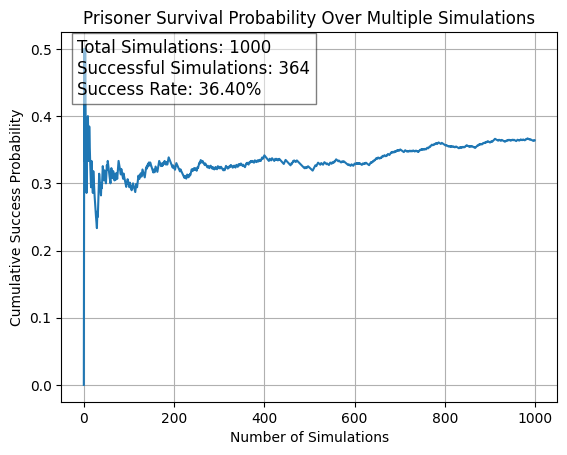

총 시뮬레이션 횟수: 1000
성공한 시뮬레이션 횟수: 364
성공 확률: 36.40%


In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_prisoners_with_output():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    # 10명의 죄수들이 순환 전략을 통해 번호를 찾는지 시뮬레이션
    for prisoner in range(1, 11):
        found = False
        current_box = prisoner

        for _ in range(5):  # 최대 5개의 상자를 열 수 있음
            if boxes[current_box - 1] == prisoner:
                found = True
                break
            else:
                current_box = boxes[current_box - 1]

        if not found:
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

def run_simulations(trials):
    success_count = 0
    results = []

    for _ in range(trials):
        if simulate_prisoners_with_output():
            success_count += 1
        results.append(success_count / (len(results) + 1))  # 현재까지의 성공 확률 기록

    return success_count, results

# 시뮬레이션 실행
trials = 1000  # 시뮬레이션을 1,000번 실행
success_count, results = run_simulations(trials)

# 그래프 시각화
plt.plot(results)
plt.title('Prisoner Survival Probability Over Multiple Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability')
plt.grid(True)

# 텍스트 추가
success_rate = success_count / trials * 100
textstr = f'Total Simulations: {trials}\nSuccessful Simulations: {success_count}\nSuccess Rate: {success_rate:.2f}%'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# 결과 텍스트 출력
print(f"총 시뮬레이션 횟수: {trials}")
print(f"성공한 시뮬레이션 횟수: {success_count}")
print(f"성공 확률: {success_rate:.2f}%")

## 순환 전략 vs 무작위 선택: 죄수들의 생존 확률 비교 시뮬레이션

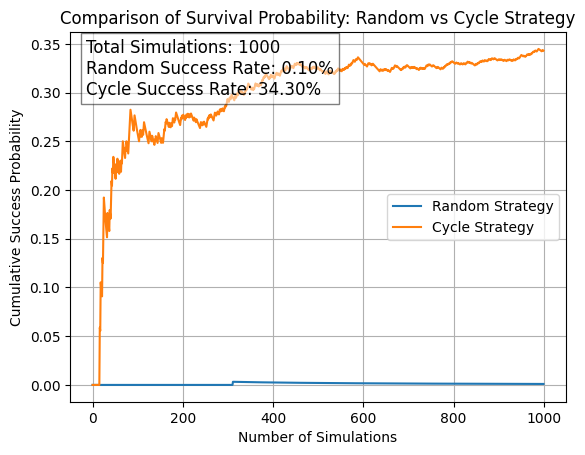

총 시뮬레이션 횟수: 1000
무작위 전략 성공 횟수: 1
순환 전략 성공 횟수: 343
무작위 전략 성공 확률: 0.10%
순환 전략 성공 확률: 34.30%


In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_prisoners_random():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    # 10명의 죄수들이 무작위로 5개의 상자를 열어보는 시뮬레이션
    for prisoner in range(1, 11):
        found = False
        attempts = random.sample(range(1, 11), 5)  # 무작위로 5개의 상자를 선택

        for attempt in attempts:
            if boxes[attempt - 1] == prisoner:
                found = True
                break

        if not found:
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

def simulate_prisoners_with_output():
    # 1부터 10까지의 번호를 랜덤하게 섞어서 상자에 넣는다.
    boxes = list(range(1, 11))
    random.shuffle(boxes)

    # 10명의 죄수들이 순환 전략을 통해 번호를 찾는지 시뮬레이션
    for prisoner in range(1, 11):
        found = False
        current_box = prisoner

        for _ in range(5):  # 최대 5개의 상자를 열 수 있음
            if boxes[current_box - 1] == prisoner:
                found = True
                break
            else:
                current_box = boxes[current_box - 1]

        if not found:
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

def run_comparative_simulations(trials):
    random_success_count = 0
    cycle_success_count = 0
    random_results = []
    cycle_results = []

    for _ in range(trials):
        if simulate_prisoners_random():
            random_success_count += 1
        random_results.append(random_success_count / (len(random_results) + 1))

        if simulate_prisoners_with_output():
            cycle_success_count += 1
        cycle_results.append(cycle_success_count / (len(cycle_results) + 1))

    return random_success_count, cycle_success_count, random_results, cycle_results

# 시뮬레이션 실행
trials = 1000  # 시뮬레이션을 1,000번 실행
random_success_count, cycle_success_count, random_results, cycle_results = run_comparative_simulations(trials)

# 그래프 시각화
plt.plot(random_results, label='Random Strategy')
plt.plot(cycle_results, label='Cycle Strategy')
plt.title('Comparison of Survival Probability: Random vs Cycle Strategy')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability')
plt.legend()
plt.grid(True)

# 텍스트 추가
random_success_rate = random_success_count / trials * 100
cycle_success_rate = cycle_success_count / trials * 100
textstr = f'Total Simulations: {trials}\nRandom Success Rate: {random_success_rate:.2f}%\nCycle Success Rate: {cycle_success_rate:.2f}%'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# 결과 텍스트 출력
print(f"총 시뮬레이션 횟수: {trials}")
print(f"무작위 전략 성공 횟수: {random_success_count}")
print(f"순환 전략 성공 횟수: {cycle_success_count}")
print(f"무작위 전략 성공 확률: {random_success_rate:.2f}%")
print(f"순환 전략 성공 확률: {cycle_success_rate:.2f}%")

# 정리 후

## 라이브러리 임포트 및 랜덤 시드 설정

In [ ]:
import random
import matplotlib.pyplot as plt

#random.seed(40)  # 랜덤 시드를 한 번 설정하여 재현 가능한 결과를 얻기 위함

## 무작위 상자 열기 전략 시뮬레이션 (단일 실행)

In [ ]:
def simulate_prisoners_random(boxes):
    print(f"상자에 들어있는 번호들: {boxes}")

    for prisoner in range(1, 11):
        print(f"\n죄수 {prisoner}가 상자를 열기 시작합니다.")
        found = False
        attempts = random.sample(range(1, 11), 5)  # 무작위로 5개의 상자를 선택

        for attempt in attempts:
            print(f"  상자 {attempt}를 열었습니다. -> 상자 안에 있는 번호: {boxes[attempt - 1]}")
            if boxes[attempt - 1] == prisoner:
                found = True
                print(f"  죄수 {prisoner}: '내 번호를 찾았어! 살 수 있어!'")
                break

        if not found:
            print(f"  죄수 {prisoner}: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'")
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공


# 상자 내용 랜덤화 (시드 고정)
# boxes = list(range(1, 11))
# random.shuffle(boxes)
# print("초기 상자 상태:", boxes)

# 상자를 수동으로 정의
boxes = [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]

# 시뮬레이션 실행
print("사용자 정의 상자 상태:", boxes)

# 이후의 코드는 동일하게 유지하며, 시뮬레이션을 실행합니다.
# 코드 3, 코드 5, 코드 6에서 상자를 이 배열로 고정하여 사용할 수 있습니다.


# 시뮬레이션 실행
if simulate_prisoners_random(boxes):
    print("\n모든 죄수가 자신의 번호를 찾아서 석방되었습니다!")
else:
    print("\n한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...")

사용자 정의 상자 상태: [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]
상자에 들어있는 번호들: [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]

죄수 1가 상자를 열기 시작합니다.
  상자 9를 열었습니다. -> 상자 안에 있는 번호: 7
  상자 7를 열었습니다. -> 상자 안에 있는 번호: 10
  상자 6를 열었습니다. -> 상자 안에 있는 번호: 5
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 8
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 9
  죄수 1: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'

한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...


## 무작위 전략 시뮬레이션 (다중 실행 및 결과 시각화)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  죄수 1: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [8, 9, 4, 5, 10, 2, 3, 6, 7, 1]

죄수 1가 상자를 열기 시작합니다.
  상자 9를 열었습니다. -> 상자 안에 있는 번호: 7
  상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 1
  죄수 1: '내 번호를 찾았어! 살 수 있어!'

죄수 2가 상자를 열기 시작합니다.
  상자 7를 열었습니다. -> 상자 안에 있는 번호: 3
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 6
  상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 1
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 5
  죄수 2: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [10, 8, 4, 2, 6, 1, 9, 3, 5, 7]

죄수 1가 상자를 열기 시작합니다.
  상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 3
  상자 1를 열었습니다. -> 상자 안에 있는 번호: 10
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 7
  상자 5를 열었습니다. -> 상자 안에 있는 번호: 6
  죄수 1: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [7, 8, 2, 9, 4, 10, 5, 3, 1, 6]

죄수 1가 상자를 열기 시작합니다.
  상자 10를 열었습니다. -> 상자 안에 있는 번호: 6
  상자 3를 열었습니다. -> 상자 안에 있는 번호: 2
  상자 2를 열었습니다. -> 상자 안에 있는 번호: 8
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 9
  상자 9를 열었습니다. -> 상자 안에 있는 

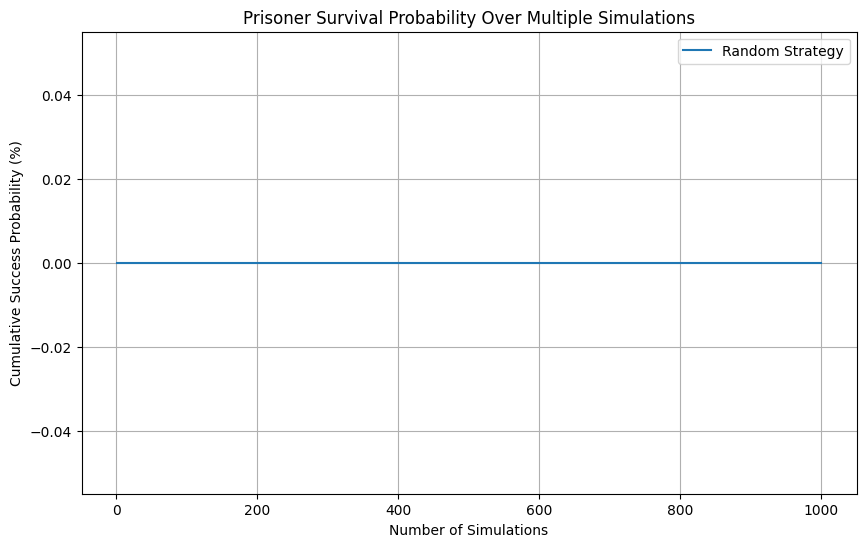

In [ ]:
def run_random_simulations(trials, boxes):
    cumulative_success_rates = []
    success_count = 0

    for i in range(1, trials + 1):
        if simulate_prisoners_random(boxes):
            success_count += 1
        random.shuffle(boxes)  # 시뮬레이션마다 상자 재배치

        cumulative_success_rate = success_count / i * 100
        cumulative_success_rates.append(cumulative_success_rate)

    return cumulative_success_rates, success_count

# 시뮬레이션 실행 및 누적 성공 확률 시각화
trials = 1000
cumulative_success_rates_random, random_success_count = run_random_simulations(trials, boxes)

random_success_rate = random_success_count / trials * 100

print(f"총 시뮬레이션 횟수: {trials}")
print(f"무작위 전략 성공 횟수: {random_success_count}")
print(f"무작위 전략 성공 확률: {random_success_rate:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, trials + 1), cumulative_success_rates_random, label='Random Strategy')
plt.title('Prisoner Survival Probability Over Multiple Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability (%)')
plt.grid(True)
plt.legend()
plt.show()

## 순환 전략 시뮬레이션 (단일 실행)

In [ ]:
# 상자를 수동으로 정의
boxes = [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]

# 시뮬레이션 실행
print("사용자 정의 상자 상태:", boxes)

# 이후의 코드는 동일하게 유지하며, 시뮬레이션을 실행합니다.
# 코드 3, 코드 5, 코드 6에서 상자를 이 배열로 고정하여 사용할 수 있습니다.

def simulate_prisoners_cycle(boxes):
    print(f"상자에 들어있는 번호들: {boxes}")

    for prisoner in range(1, 11):
        print(f"\n죄수 {prisoner}가 상자를 열기 시작합니다.")
        found = False
        current_box = prisoner

        for attempt in range(1, 6):  # 최대 5개의 상자를 열 수 있음
            print(f"  시도 {attempt}: 상자 {current_box}를 열었습니다. -> 상자 안에 있는 번호: {boxes[current_box - 1]}")
            if boxes[current_box - 1] == prisoner:
                found = True
                print(f"  죄수 {prisoner}: '내 번호를 찾았어! 살 수 있어!'")
                break
            else:
                current_box = boxes[current_box - 1]

        if not found:
            print(f"  죄수 {prisoner}: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'")
            return False  # 한 명이라도 실패하면 전체 실패

    return True  # 모든 죄수가 성공하면 전체 성공

# 동일한 초기 상자를 사용
if simulate_prisoners_cycle(boxes):
    print("\n모든 죄수가 자신의 번호를 찾아서 석방되었습니다!")
else:
    print("\n한 명 이상의 죄수가 자신의 번호를 찾지 못해서 모두 처형됩니다...")

사용자 정의 상자 상태: [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]
상자에 들어있는 번호들: [3, 1, 4, 2, 6, 5, 10, 9, 7, 8]

죄수 1가 상자를 열기 시작합니다.
  시도 1: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 3
  시도 2: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  시도 3: 상자 4를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 4: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 1
  죄수 1: '내 번호를 찾았어! 살 수 있어!'

죄수 2가 상자를 열기 시작합니다.
  시도 1: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 1
  시도 2: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 3
  시도 3: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  시도 4: 상자 4를 열었습니다. -> 상자 안에 있는 번호: 2
  죄수 2: '내 번호를 찾았어! 살 수 있어!'

죄수 3가 상자를 열기 시작합니다.
  시도 1: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  시도 2: 상자 4를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 3: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 1
  시도 4: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 3
  죄수 3: '내 번호를 찾았어! 살 수 있어!'

죄수 4가 상자를 열기 시작합니다.
  시도 1: 상자 4를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 2: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 1
  시도 3: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 3
  시도 4: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 4
  죄수 4: '내 번호를 찾았어! 살 수 있어!'

죄수 5가 상자를 열기 시작합니다.
  시도 1: 상자 5를 열었습니다. -> 상자 안에 있는 번호: 6
  시도 2: 상자 6를 열었습니다. -> 

## 순환 전략 시뮬레이션 (다중 실행 및 결과 시각화)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  시도 1: 상자 9를 열었습니다. -> 상자 안에 있는 번호: 9
  죄수 9: '내 번호를 찾았어! 살 수 있어!'

죄수 10가 상자를 열기 시작합니다.
  시도 1: 상자 10를 열었습니다. -> 상자 안에 있는 번호: 8
  시도 2: 상자 8를 열었습니다. -> 상자 안에 있는 번호: 7
  시도 3: 상자 7를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 4: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 3
  시도 5: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 10
  죄수 10: '내 번호를 찾았어! 살 수 있어!'
상자에 들어있는 번호들: [8, 3, 5, 1, 6, 7, 10, 9, 2, 4]

죄수 1가 상자를 열기 시작합니다.
  시도 1: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 8
  시도 2: 상자 8를 열었습니다. -> 상자 안에 있는 번호: 9
  시도 3: 상자 9를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 4: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 3
  시도 5: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 5
  죄수 1: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [8, 9, 6, 4, 3, 1, 2, 7, 5, 10]

죄수 1가 상자를 열기 시작합니다.
  시도 1: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 8
  시도 2: 상자 8를 열었습니다. -> 상자 안에 있는 번호: 7
  시도 3: 상자 7를 열었습니다. -> 상자 안에 있는 번호: 2
  시도 4: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 9
  시도 5: 상자 9를 열었습니다. -> 상자 안에 있는 번호: 5
  죄수 1: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [4, 5, 10, 3, 1, 8, 6, 2, 9, 

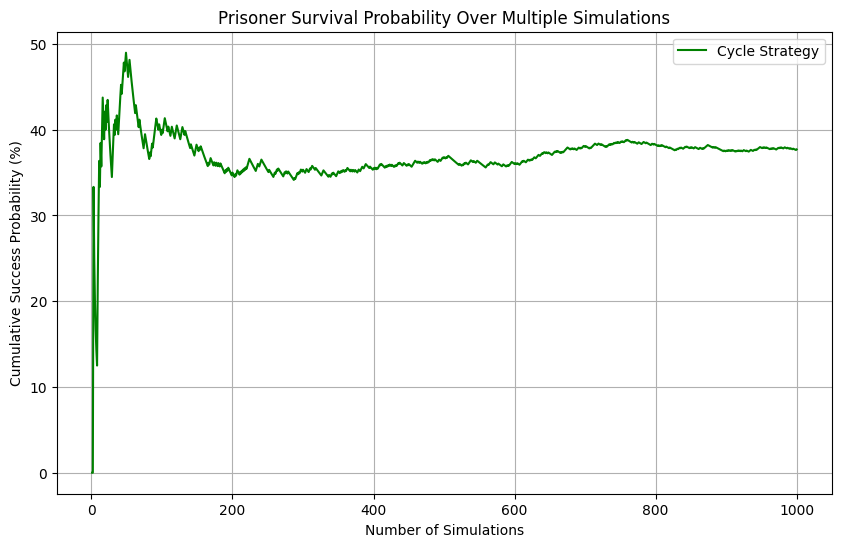

In [ ]:
def run_cycle_simulations(trials, boxes):
    cumulative_success_rates = []
    success_count = 0

    for i in range(1, trials + 1):
        if simulate_prisoners_cycle(boxes):
            success_count += 1
        random.shuffle(boxes)  # 시뮬레이션마다 상자 재배치

        cumulative_success_rate = success_count / i * 100
        cumulative_success_rates.append(cumulative_success_rate)

    return cumulative_success_rates, success_count

# 시뮬레이션 실행 및 누적 성공 확률 시각화
trials = 1000
cumulative_success_rates_cycle, cycle_success_count = run_cycle_simulations(trials, boxes)

cycle_success_rate = cycle_success_count / trials * 100

print(f"총 시뮬레이션 횟수: {trials}")
print(f"순환 전략 성공 횟수: {cycle_success_count}")
print(f"순환 전략 성공 확률: {cycle_success_rate:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, trials + 1), cumulative_success_rates_cycle, label='Cycle Strategy', color='green')
plt.title('Prisoner Survival Probability Over Multiple Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability (%)')
plt.grid(True)
plt.legend()
plt.show()

## 무작위 및 순환 전략 비교 시뮬레이션 (결과 비교 시각화)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  죄수 2: '내 번호를 찾았어! 살 수 있어!'

죄수 3가 상자를 열기 시작합니다.
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 4
  상자 8를 열었습니다. -> 상자 안에 있는 번호: 3
  죄수 3: '내 번호를 찾았어! 살 수 있어!'

죄수 4가 상자를 열기 시작합니다.
  상자 5를 열었습니다. -> 상자 안에 있는 번호: 9
  상자 1를 열었습니다. -> 상자 안에 있는 번호: 7
  상자 4를 열었습니다. -> 상자 안에 있는 번호: 4
  죄수 4: '내 번호를 찾았어! 살 수 있어!'

죄수 5가 상자를 열기 시작합니다.
  상자 3를 열었습니다. -> 상자 안에 있는 번호: 10
  상자 5를 열었습니다. -> 상자 안에 있는 번호: 9
  상자 6를 열었습니다. -> 상자 안에 있는 번호: 8
  상자 7를 열었습니다. -> 상자 안에 있는 번호: 6
  상자 9를 열었습니다. -> 상자 안에 있는 번호: 2
  죄수 5: '내 번호를 찾지 못했어... 이제 우린 모두 끝이야.'
상자에 들어있는 번호들: [1, 4, 9, 2, 10, 5, 3, 8, 7, 6]

죄수 1가 상자를 열기 시작합니다.
  시도 1: 상자 1를 열었습니다. -> 상자 안에 있는 번호: 1
  죄수 1: '내 번호를 찾았어! 살 수 있어!'

죄수 2가 상자를 열기 시작합니다.
  시도 1: 상자 2를 열었습니다. -> 상자 안에 있는 번호: 4
  시도 2: 상자 4를 열었습니다. -> 상자 안에 있는 번호: 2
  죄수 2: '내 번호를 찾았어! 살 수 있어!'

죄수 3가 상자를 열기 시작합니다.
  시도 1: 상자 3를 열었습니다. -> 상자 안에 있는 번호: 9
  시도 2: 상자 9를 열었습니다. -> 상자 안에 있는 번호: 7
  시도 3: 상자 7를 열었습니다. -> 상자 안에 있는 번호: 3
  죄수 3: '내 번호를 찾았어! 살 수 있어!'

죄수 4가 상자를 열기

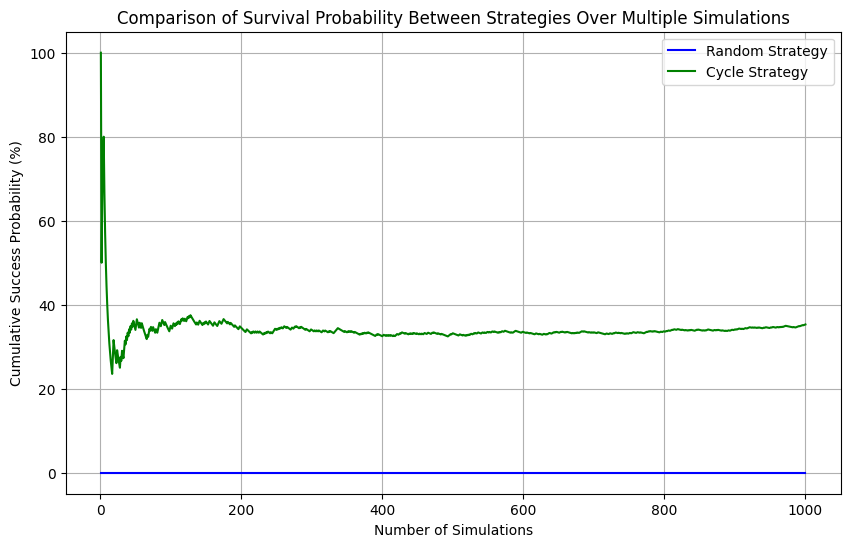

In [ ]:
def run_comparative_simulations(trials, boxes):
    cumulative_success_rates_random = []
    cumulative_success_rates_cycle = []

    random_success_count = 0
    cycle_success_count = 0

    for i in range(1, trials + 1):
        if simulate_prisoners_random(boxes):
            random_success_count += 1
        random.shuffle(boxes)

        if simulate_prisoners_cycle(boxes):
            cycle_success_count += 1
        random.shuffle(boxes)

        cumulative_success_rates_random.append(random_success_count / i * 100)
        cumulative_success_rates_cycle.append(cycle_success_count / i * 100)

    return cumulative_success_rates_random, cumulative_success_rates_cycle, random_success_count, cycle_success_count

# 시뮬레이션 실행 및 결과 출력
trials = 1000
cumulative_success_rates_random, cumulative_success_rates_cycle, random_success_count, cycle_success_count = run_comparative_simulations(trials, boxes)

random_success_rate = random_success_count / trials * 100
cycle_success_rate = cycle_success_count / trials * 100

print(f"총 시뮬레이션 횟수: {trials}")
print(f"무작위 전략 성공 횟수: {random_success_count}")
print(f"순환 전략 성공 횟수: {cycle_success_count}")
print(f"무작위 전략 성공 확률: {random_success_rate:.2f}%")
print(f"순환 전략 성공 확률: {cycle_success_rate:.2f}%")

# 비교 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, trials + 1), cumulative_success_rates_random, label='Random Strategy', color='blue')
plt.plot(range(1, trials + 1), cumulative_success_rates_cycle, label='Cycle Strategy', color='green')
plt.title('Comparison of Survival Probability Between Strategies Over Multiple Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Success Probability (%)')
plt.grid(True)
plt.legend()
plt.show()